In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [248]:
data= pd.read_csv("Desktop/tableau works/ctm/upgrad/regression assignment/day (1).csv")

In [249]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [251]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [252]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [253]:
#we can drop the casual, registered columns because cnt= casual+registered
data.drop(['casual','registered'],axis=1,inplace=True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [254]:
#we can drop dteday column because we have yr and mnth columns already

data.drop(['dteday'],axis=1,inplace=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [255]:
#from data dictionary we can see that instant is an index column,  so we drop it
data.drop(['instant'],axis=1,inplace=True)

In [256]:
#by seeing the datadictionary we can say that season,yr,mnth,holiday,weekday,workingday,weathersit all are categorical variables
#We will replace season,weekday and weathersit with appropriate values

In [257]:
data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [258]:
data['weathersit'].replace({1: "Clear/Few clouds/Partly cloudy", 2: "Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist", 3: "Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds", 4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist/Snow + Fog"},inplace=True)
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear/Few clouds/Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear/Few clouds/Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear/Few clouds/Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear/Few clouds/Partly cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear/Few clouds/Partly cloudy,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear/Few clouds/Partly cloudy,6.184153,7.54440,48.2917,14.958889,1321


In [259]:
data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear/Few clouds/Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear/Few clouds/Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear/Few clouds/Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear/Few clouds/Partly cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear/Few clouds/Partly cloudy,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear/Few clouds/Partly cloudy,6.184153,7.54440,48.2917,14.958889,1321


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


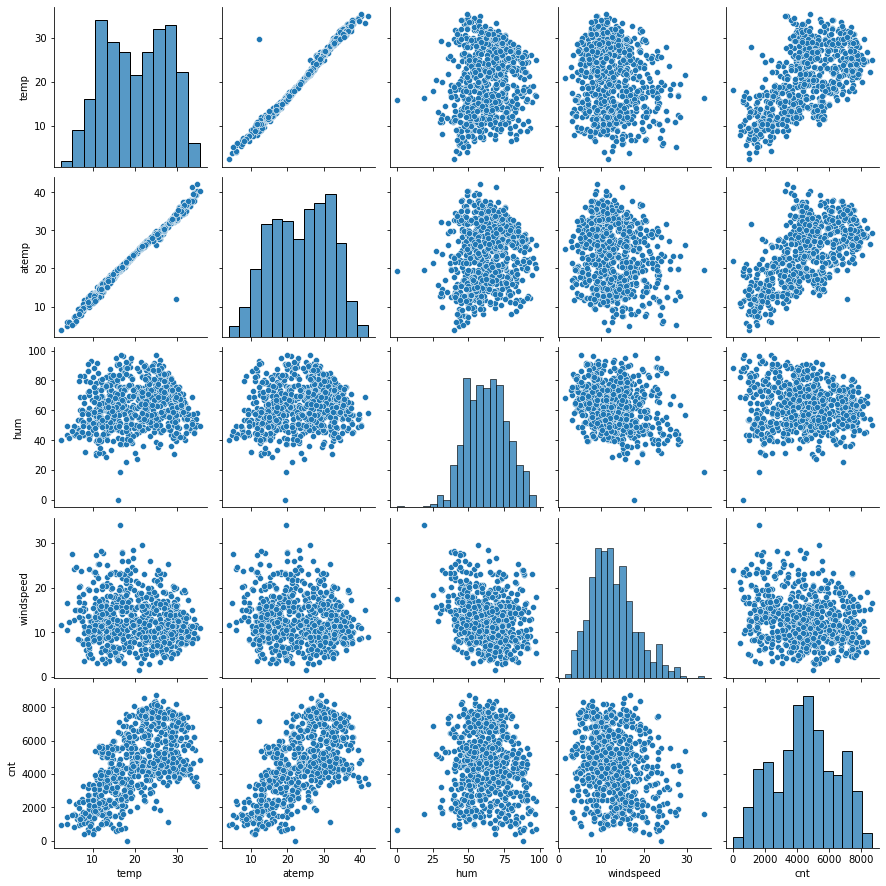

In [261]:
#Pair plots of numerical variables
sns.pairplot(data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [262]:
data.corr()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,-0.004688,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-2.945396e-03,-4.687953e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,4.878919e-02,2.190833e-01,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


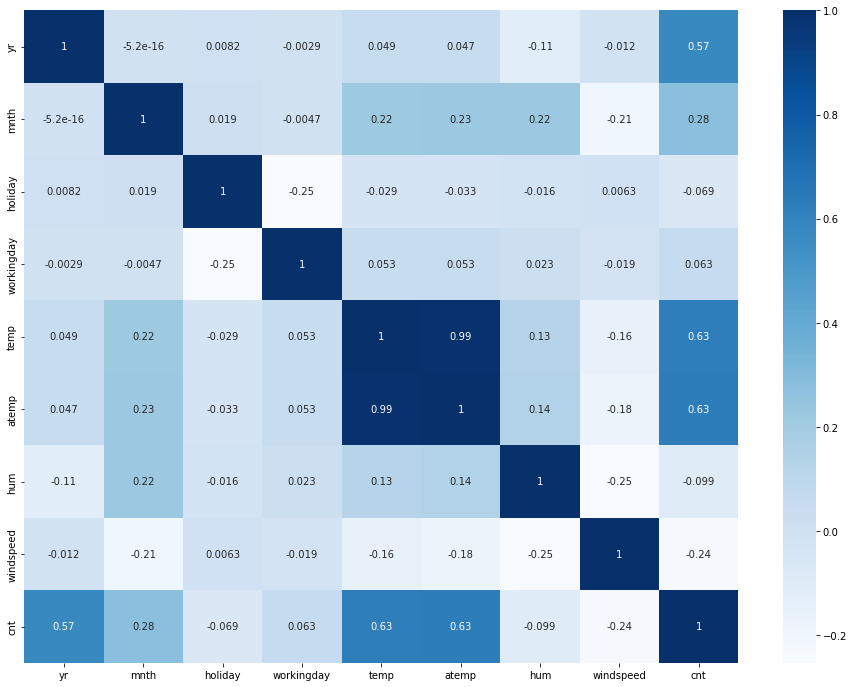

In [263]:
plt.figure(figsize = (16, 12))
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.show()

In [264]:
###droping the highly correlated values
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

data.drop(['temp'],axis=1,inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist + Cloudy/Mist + Broken clouds/Mist + Few ...,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear/Few clouds/Partly cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear/Few clouds/Partly cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear/Few clouds/Partly cloudy,11.46350,43.6957,12.522300,1600


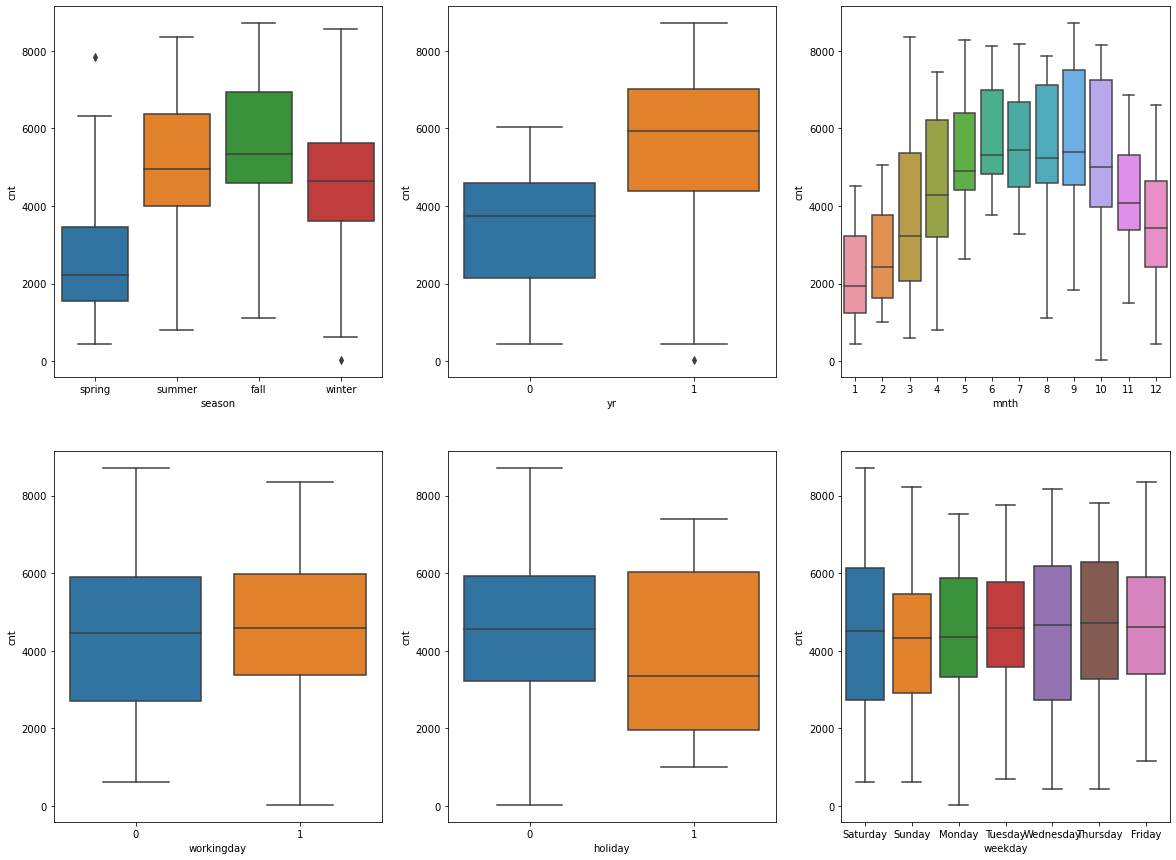

In [265]:
#Data visualisation for categorical columns
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.show()

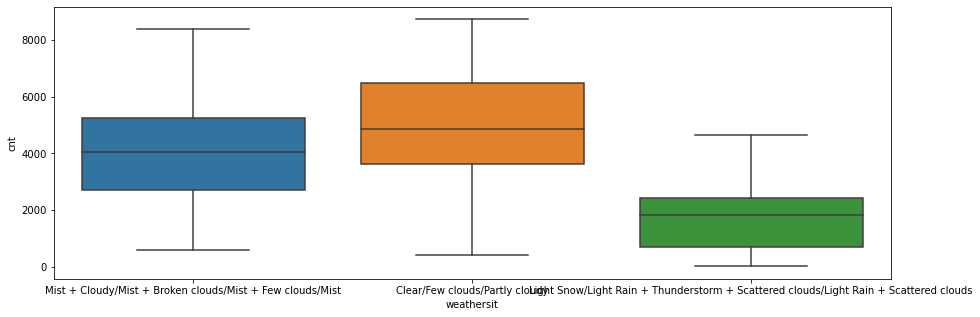

In [266]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

In [267]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_dummyvar=pd.get_dummies(data['season'],drop_first=True)
Weather_dummyvar=pd.get_dummies(data['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(data['weekday'],drop_first=True)
Month=pd.get_dummies(data['mnth'],drop_first=True)

In [268]:
data=pd.concat([data,Season_dummyvar],axis=1)
data=pd.concat([data,Weather_dummyvar],axis=1)
data=pd.concat([data,Day_of_week],axis=1)
data=pd.concat([data,Month],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   season                                                                                 730 non-null    object 
 1   yr                                                                                     730 non-null    int64  
 2   mnth                                                                                   730 non-null    int64  
 3   holiday                                                                                730 non-null    int64  
 4   weekday                                                                                730 non-null    object 
 5   workingday                                                                    

In [269]:
#Deleting the orginal columns season.weathersit,weekday,mnth
data.drop(['season'],axis=1,inplace=True)
data.drop(['weathersit'],axis=1,inplace=True)
data.drop(['weekday'],axis=1,inplace=True)
data.drop(['mnth'],axis=1,inplace=True)
data.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
#splitting the data to train and test data
from sklearn.model_selection import train_test_split

In [271]:
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [272]:
data_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [273]:
data_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [274]:
#Scaling the Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [275]:
# Fit on data
num_vars=['atemp','hum','windspeed','cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [276]:
data_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [277]:
data_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [278]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

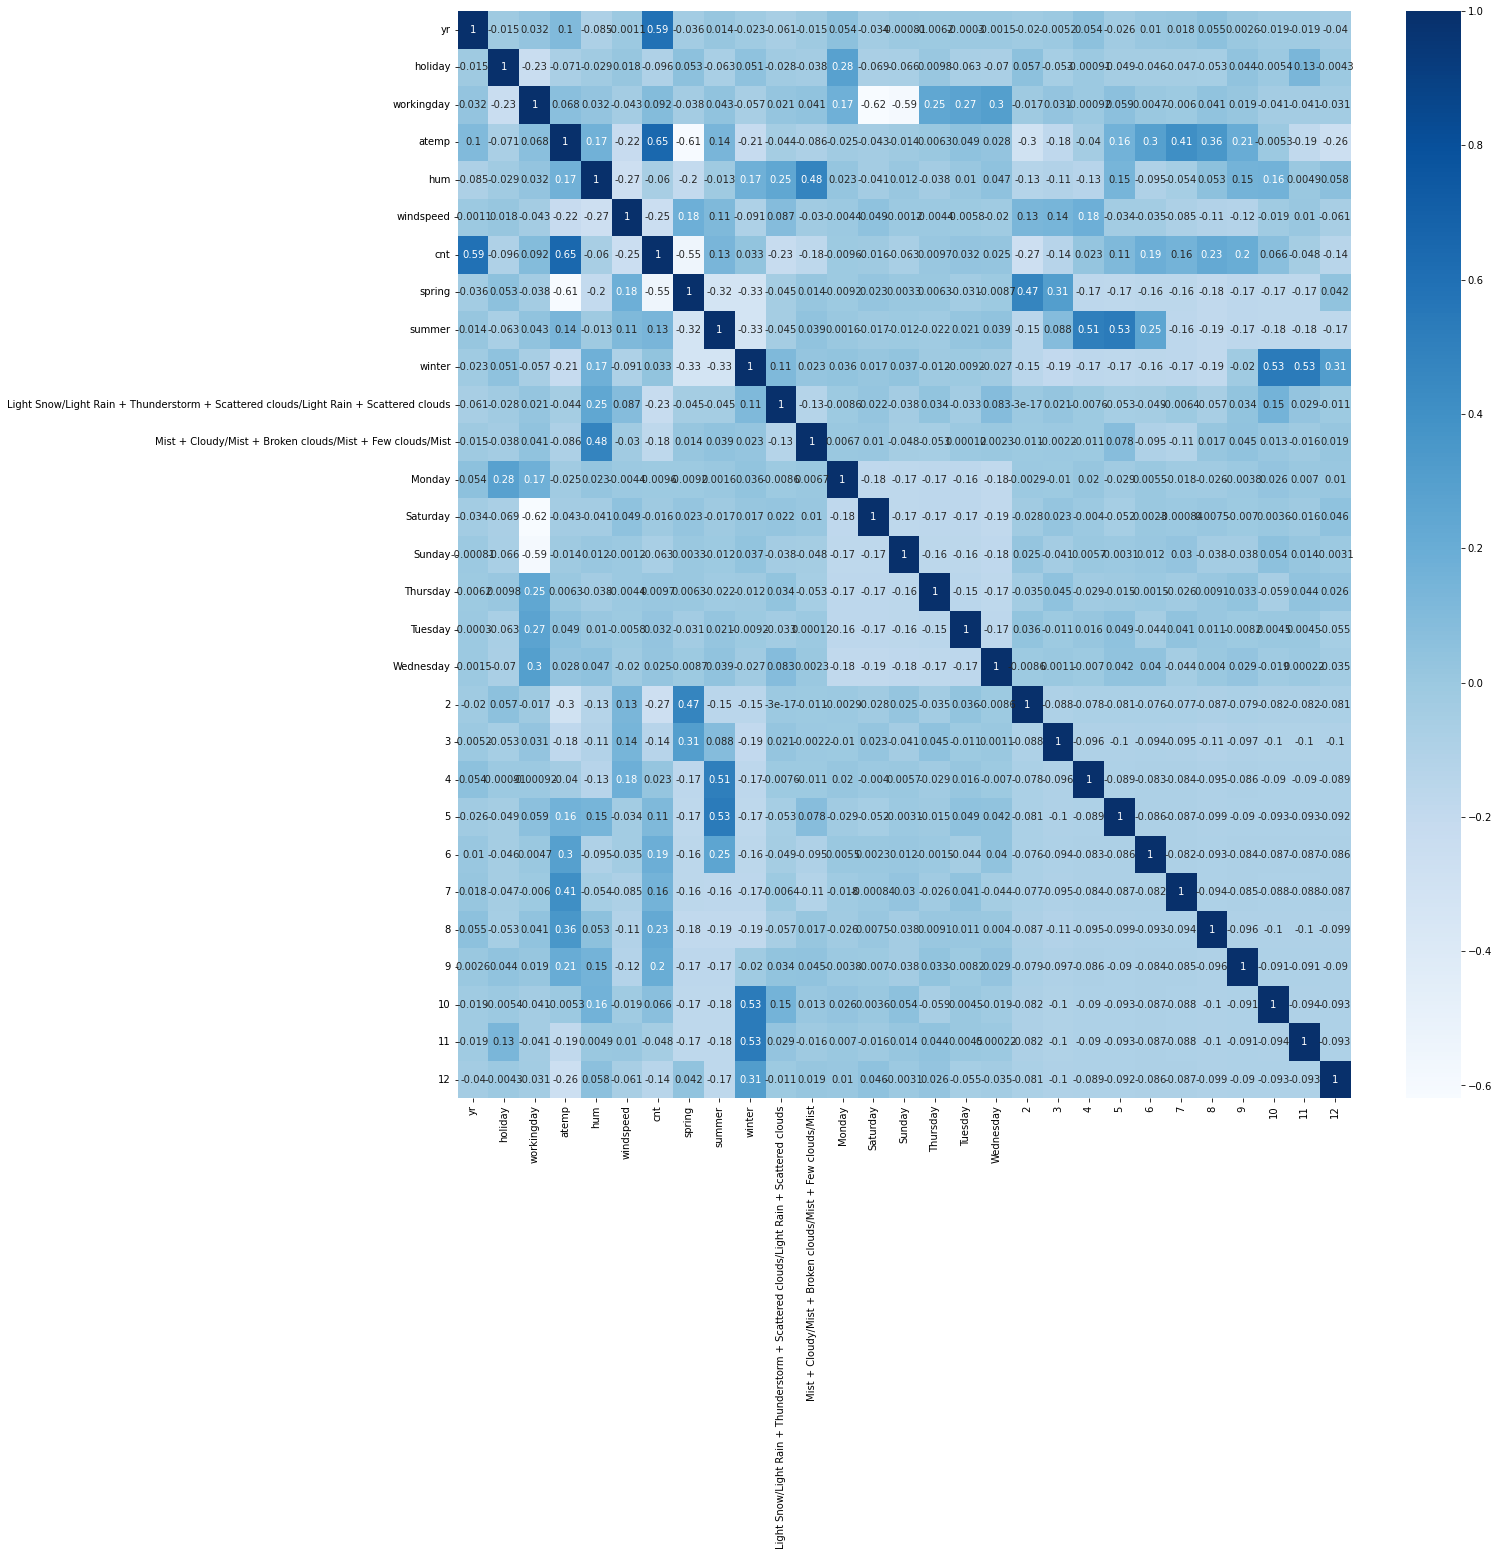

In [279]:
plt.figure(figsize = (20, 20))
sns.heatmap(data_train.corr(), annot=True, cmap="Blues")
plt.show()

In [280]:
#CREATING X AND Y
y_train = data_train.pop('cnt')
X_train = data_train

In [281]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [282]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [283]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          4.12e-180
Time:                        19:43:46   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2029      0.034      6.029      0.000       0.137       0.269
yr                                                                                        0.2342      0.008     28.937      0.000       0.218       0.250
holiday                                                                                   0.0066      0.024      0.280      0.780      -0.040       0.053
workingday                                                                                0.0865      0.012      7.132      0.000       0.063       0.110
atemp                                                                                     0.4195      0.045      9.248      0.000       0.330       0.509
hum                                                                                      -0.1456      0.039     -3.758      0.000      -0.222      -0.069
windspeed                                                                                -0.1686      0.026     -6.506      0.000      -0.219      -0.118
spring                                                                                   -0.0551      0.030     -1.826      0.068      -0.114       0.004
summer                                                                                    0.0308      0.026      1.171      0.242      -0.021       0.083
winter                                                                                    0.0998      0.028      3.553      0.000       0.045       0.155
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.2546      0.027     -9.566      0.000      -0.307      -0.202
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0626      0.011     -5.961      0.000      -0.083      -0.042
Monday                                                                                   -0.0263      0.015     -1.707      0.089      -0.057       0.004
Saturday                                                                                  0.0823      0.014      6.041      0.000       0.056       0.109
Sunday                                                                                    0.0276      0.014      1.966      0.050     8.6e-06       0.055
Thursday                                                                                 -0.0132      0.016     -0.843      0.399      -0.044       0.018
Tuesday                                                                                  -0.0222      0.016     -1.418      0.157      -0.053       0.009
Wed

In [284]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [285]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [286]:
#checking VIF

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,workingday,77.32
12,Saturday,17.84
13,Sunday,16.87
6,spring,10.74
8,winter,9.47
23,8,9.26
22,7,8.40
7,summer,8.23
24,9,6.51
21,6,6.35


In [287]:
#COLUMN holiday HAS A HIGH P VALUE,  SO WE DROP IT 
X_train=X_train.drop(['holiday'],axis=1)

In [288]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          4.12e-180
Time:                        19:43:47   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2096      0.050      4.209      0.000       0.112       0.307
yr                                                                                        0.2342      0.008     28.937      0.000       0.218       0.250
workingday                                                                                0.0798      0.027      2.982      0.003       0.027       0.132
atemp                                                                                     0.4195      0.045      9.248      0.000       0.330       0.509
hum                                                                                      -0.1456      0.039     -3.758      0.000      -0.222      -0.069
windspeed                                                                                -0.1686      0.026     -6.506      0.000      -0.219      -0.118
spring                                                                                   -0.0551      0.030     -1.826      0.068      -0.114       0.004
summer                                                                                    0.0308      0.026      1.171      0.242      -0.021       0.083
winter                                                                                    0.0998      0.028      3.553      0.000       0.045       0.155
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.2546      0.027     -9.566      0.000      -0.307      -0.202
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0626      0.011     -5.961      0.000      -0.083      -0.042
Monday                                                                                   -0.0263      0.015     -1.707      0.089      -0.057       0.004
Saturday                                                                                  0.0756      0.030      2.496      0.013       0.016       0.135
Sunday                                                                                    0.0209      0.030      0.689      0.491      -0.039       0.081
Thursday                                                                                 -0.0132      0.016     -0.843      0.399      -0.044       0.018
Tuesday                                                                                  -0.0222      0.016     -1.418      0.157      -0.053       0.009
Wednesday                                                                                -0.0081      0.015     -0.540      0.589      -0.038       0.021
2  

In [289]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,39.79
3,hum,36.20
1,workingday,22.35
7,winter,11.23
6,summer,9.37
5,spring,8.98
22,8,8.47
21,7,7.67
19,5,6.57
11,Saturday,6.55


In [290]:
#COLUMN atemp HAS A HIGH VIF VALUE,  SO WE DROP IT 
X_train=X_train.drop(['atemp'],axis=1)

In [291]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     87.25
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          3.67e-164
Time:                        19:43:48   Log-Likelihood:                 482.19
No. Observations:                 510   AIC:                            -910.4
Df Residuals:                     483   BIC:                            -796.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2794      0.053      5.238      0.000       0.175       0.384
yr                                                                                        0.2459      0.009     28.377      0.000       0.229       0.263
workingday                                                                                0.0689      0.029      2.377      0.018       0.012       0.126
hum                                                                                      -0.0492      0.040     -1.217      0.224      -0.129       0.030
windspeed                                                                                -0.1784      0.028     -6.359      0.000      -0.234      -0.123
spring                                                                                   -0.0842      0.032     -2.592      0.010      -0.148      -0.020
summer                                                                                   -0.0003      0.028     -0.011      0.991      -0.056       0.055
winter                                                                                    0.0820      0.030      2.700      0.007       0.022       0.142
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.2922      0.029    -10.252      0.000      -0.348      -0.236
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0805      0.011     -7.198      0.000      -0.103      -0.059
Monday                                                                                   -0.0261      0.017     -1.559      0.120      -0.059       0.007
Saturday                                                                                  0.0650      0.033      1.980      0.048       0.001       0.129
Sunday                                                                                    0.0085      0.033      0.258      0.796      -0.056       0.073
Thursday                                                                                 -0.0062      0.017     -0.366      0.715      -0.039       0.027
Tuesday                                                                                  -0.0168      0.017     -0.990      0.322      -0.050       0.016
Wednesday                                                                                -0.0039      0.016     -0.242      0.809      -0.036       0.028
2                                                                                         0.0655      0.022      2.957      0.003       0.022       0.109
3  

In [292]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     87.25
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          3.67e-164
Time:                        19:43:48   Log-Likelihood:                 482.19
No. Observations:                 510   AIC:                            -910.4
Df Residuals:                     483   BIC:                            -796.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2794      0.053      5.238      0.000       0.175       0.384
yr                                                                                        0.2459      0.009     28.377      0.000       0.229       0.263
workingday                                                                                0.0689      0.029      2.377      0.018       0.012       0.126
hum                                                                                      -0.0492      0.040     -1.217      0.224      -0.129       0.030
windspeed                                                                                -0.1784      0.028     -6.359      0.000      -0.234      -0.123
spring                                                                                   -0.0842      0.032     -2.592      0.010      -0.148      -0.020
summer                                                                                   -0.0003      0.028     -0.011      0.991      -0.056       0.055
winter                                                                                    0.0820      0.030      2.700      0.007       0.022       0.142
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.2922      0.029    -10.252      0.000      -0.348      -0.236
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0805      0.011     -7.198      0.000      -0.103      -0.059
Monday                                                                                   -0.0261      0.017     -1.559      0.120      -0.059       0.007
Saturday                                                                                  0.0650      0.033      1.980      0.048       0.001       0.129
Sunday                                                                                    0.0085      0.033      0.258      0.796      -0.056       0.073
Thursday                                                                                 -0.0062      0.017     -0.366      0.715      -0.039       0.027
Tuesday                                                                                  -0.0168      0.017     -0.990      0.322      -0.050       0.016
Wednesday                                                                                -0.0039      0.016     -0.242      0.809      -0.036       0.028
2                                                                                         0.0655      0.022      2.957      0.003       0.022       0.109
3  

In [293]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,hum,31.46
1,workingday,22.31
6,winter,11.23
5,summer,9.32
4,spring,8.97
10,Saturday,6.54
11,Sunday,6.20
3,windspeed,5.35
23,10,5.16
21,8,5.12


In [294]:
#COLUMN hum HAS A HIGH VIF VALUE,  SO WE DROP IT 
X_train=X_train.drop(['hum'],axis=1)

In [296]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     90.59
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          7.93e-165
Time:                        19:44:28   Log-Likelihood:                 481.41
No. Observations:                 510   AIC:                            -910.8
Df Residuals:                     484   BIC:                            -800.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2498      0.047      5.260      0.000       0.156       0.343
yr                                                                                        0.2467      0.009     28.540      0.000       0.230       0.264
workingday                                                                                0.0690      0.029      2.381      0.018       0.012       0.126
windspeed                                                                                -0.1692      0.027     -6.260      0.000      -0.222      -0.116
spring                                                                                   -0.0844      0.033     -2.597      0.010      -0.148      -0.021
summer                                                                                   -0.0020      0.028     -0.070      0.944      -0.058       0.054
winter                                                                                    0.0815      0.030      2.683      0.008       0.022       0.141
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.3054      0.026    -11.569      0.000      -0.357      -0.254
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0880      0.009     -9.430      0.000      -0.106      -0.070
Monday                                                                                   -0.0273      0.017     -1.633      0.103      -0.060       0.006
Saturday                                                                                  0.0650      0.033      1.981      0.048       0.001       0.130
Sunday                                                                                    0.0070      0.033      0.213      0.831      -0.058       0.072
Thursday                                                                                 -0.0065      0.017     -0.386      0.700      -0.040       0.027
Tuesday                                                                                  -0.0178      0.017     -1.053      0.293      -0.051       0.015
Wednesday                                                                                -0.0049      0.016     -0.301      0.764      -0.037       0.027
2                                                                                         0.0662      0.022      2.986      0.003       0.023       0.110
3                                                                                         0.1562      0.022      7.065      0.000       0.113       0.200
4  

In [295]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,20.08
5,winter,10.81
4,summer,8.70
3,spring,7.59
9,Saturday,5.87
10,Sunday,5.40
2,windspeed,5.16
22,10,4.72
23,11,4.63
17,5,4.16


In [297]:
#COLUMN summer HAS A HIGH p VALUE,  SO WE DROP IT 
X_train=X_train.drop(['summer'],axis=1)

In [298]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     94.56
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          8.08e-166
Time:                        19:46:08   Log-Likelihood:                 481.41
No. Observations:                 510   AIC:                            -912.8
Df Residuals:                     485   BIC:                            -807.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2483      0.043      5.806      0.000       0.164       0.332
yr                                                                                        0.2467      0.009     28.570      0.000       0.230       0.264
workingday                                                                                0.0691      0.029      2.384      0.018       0.012       0.126
windspeed                                                                                -0.1693      0.027     -6.275      0.000      -0.222      -0.116
spring                                                                                   -0.0829      0.025     -3.358      0.001      -0.131      -0.034
winter                                                                                    0.0824      0.028      2.946      0.003       0.027       0.137
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.3053      0.026    -11.582      0.000      -0.357      -0.254
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0881      0.009     -9.456      0.000      -0.106      -0.070
Monday                                                                                   -0.0273      0.017     -1.635      0.103      -0.060       0.005
Saturday                                                                                  0.0650      0.033      1.982      0.048       0.001       0.129
Sunday                                                                                    0.0070      0.033      0.214      0.831      -0.058       0.072
Thursday                                                                                 -0.0065      0.017     -0.386      0.700      -0.040       0.027
Tuesday                                                                                  -0.0178      0.017     -1.055      0.292      -0.051       0.015
Wednesday                                                                                -0.0049      0.016     -0.303      0.762      -0.037       0.027
2                                                                                         0.0662      0.022      2.989      0.003       0.023       0.110
3                                                                                         0.1561      0.022      7.113      0.000       0.113       0.199
4                                                                                         0.1950      0.033      5.957      0.000       0.131       0.259
5  

In [299]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,17.74
4,winter,10.01
3,spring,5.40
2,windspeed,5.09
8,Saturday,5.02
21,10,4.68
9,Sunday,4.68
22,11,4.60
19,8,3.45
16,5,3.19


In [301]:
#COLUMN sunday HAS A HIGH p VALUE,  SO WE DROP IT 
X_train=X_train.drop(['Sunday'],axis=1)

In [302]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     98.87
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          8.21e-167
Time:                        19:48:48   Log-Likelihood:                 481.38
No. Observations:                 510   AIC:                            -914.8
Df Residuals:                     486   BIC:                            -813.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2544      0.032      7.997      0.000       0.192       0.317
yr                                                                                        0.2467      0.009     28.614      0.000       0.230       0.264
workingday                                                                                0.0637      0.015      4.361      0.000       0.035       0.092
windspeed                                                                                -0.1693      0.027     -6.282      0.000      -0.222      -0.116
spring                                                                                   -0.0830      0.025     -3.363      0.001      -0.131      -0.034
winter                                                                                    0.0827      0.028      2.969      0.003       0.028       0.137
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.3051      0.026    -11.594      0.000      -0.357      -0.253
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0881      0.009     -9.465      0.000      -0.106      -0.070
Monday                                                                                   -0.0288      0.015     -1.919      0.056      -0.058       0.001
Saturday                                                                                  0.0588      0.015      3.846      0.000       0.029       0.089
Thursday                                                                                 -0.0075      0.016     -0.462      0.644      -0.040       0.024
Tuesday                                                                                  -0.0187      0.016     -1.138      0.256      -0.051       0.014
Wednesday                                                                                -0.0058      0.016     -0.367      0.714      -0.037       0.025
2                                                                                         0.0661      0.022      2.989      0.003       0.023       0.110
3                                                                                         0.1562      0.022      7.134      0.000       0.113       0.199
4                                                                                         0.1951      0.033      5.966      0.000       0.131       0.259
5                                                                                         0.2746      0.032      8.543      0.000       0.211       0.338
6  

In [303]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,9.00
1,workingday,7.57
2,windspeed,4.98
21,11,4.30
20,10,4.28
3,spring,3.27
22,12,2.82
11,Wednesday,2.15
0,yr,2.04
10,Tuesday,1.94


In [304]:
#COLUMN Thursday HAS A HIGH p VALUE,  SO WE DROP IT 
X_train=X_train.drop(['Thursday'],axis=1)

In [305]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          8.86e-168
Time:                        19:49:54   Log-Likelihood:                 481.27
No. Observations:                 510   AIC:                            -916.5
Df Residuals:                     487   BIC:                            -819.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2535      0.032      7.990      0.000       0.191       0.316
yr                                                                                        0.2467      0.009     28.636      0.000       0.230       0.264
workingday                                                                                0.0606      0.013      4.674      0.000       0.035       0.086
windspeed                                                                                -0.1693      0.027     -6.288      0.000      -0.222      -0.116
spring                                                                                   -0.0827      0.025     -3.357      0.001      -0.131      -0.034
winter                                                                                    0.0834      0.028      2.997      0.003       0.029       0.138
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.3057      0.026    -11.638      0.000      -0.357      -0.254
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0877      0.009     -9.468      0.000      -0.106      -0.069
Monday                                                                                   -0.0256      0.013     -1.926      0.055      -0.052       0.001
Saturday                                                                                  0.0593      0.015      3.894      0.000       0.029       0.089
Tuesday                                                                                  -0.0151      0.014     -1.044      0.297      -0.043       0.013
Wednesday                                                                                -0.0021      0.014     -0.156      0.876      -0.029       0.025
2                                                                                         0.0664      0.022      3.004      0.003       0.023       0.110
3                                                                                         0.1563      0.022      7.141      0.000       0.113       0.199
4                                                                                         0.1955      0.033      5.987      0.000       0.131       0.260
5                                                                                         0.2750      0.032      8.567      0.000       0.212       0.338
6                                                                                         0.3005      0.033      9.188      0.000       0.236       0.365
7  

In [306]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,8.99
1,workingday,5.80
2,windspeed,4.98
19,10,4.27
20,11,4.26
3,spring,3.27
21,12,2.81
0,yr,2.04
13,4,1.91
8,Saturday,1.87


In [307]:
#COLUMN Wednesday HAS A HIGH p VALUE,  SO WE DROP IT 
X_train=X_train.drop(['Wednesday'],axis=1)

In [308]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          8.50e-169
Time:                        19:50:51   Log-Likelihood:                 481.26
No. Observations:                 510   AIC:                            -918.5
Df Residuals:                     488   BIC:                            -825.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2535      0.032      7.997      0.000       0.191       0.316
yr                                                                                        0.2467      0.009     28.664      0.000       0.230       0.264
workingday                                                                                0.0599      0.012      4.930      0.000       0.036       0.084
windspeed                                                                                -0.1693      0.027     -6.293      0.000      -0.222      -0.116
spring                                                                                   -0.0828      0.025     -3.363      0.001      -0.131      -0.034
winter                                                                                    0.0833      0.028      2.999      0.003       0.029       0.138
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.3060      0.026    -11.690      0.000      -0.357      -0.255
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0877      0.009     -9.477      0.000      -0.106      -0.069
Monday                                                                                   -0.0249      0.013     -1.989      0.047      -0.050      -0.000
Saturday                                                                                  0.0594      0.015      3.905      0.000       0.030       0.089
Tuesday                                                                                  -0.0143      0.014     -1.057      0.291      -0.041       0.012
2                                                                                         0.0663      0.022      3.006      0.003       0.023       0.110
3                                                                                         0.1563      0.022      7.150      0.000       0.113       0.199
4                                                                                         0.1955      0.033      5.992      0.000       0.131       0.260
5                                                                                         0.2749      0.032      8.575      0.000       0.212       0.338
6                                                                                         0.3004      0.033      9.196      0.000       0.236       0.365
7                                                                                         0.2741      0.033      8.412      0.000       0.210       0.338
8  

In [309]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,8.99
1,workingday,5.04
2,windspeed,4.98
18,10,4.27
19,11,4.26
3,spring,3.26
20,12,2.81
0,yr,2.04
12,4,1.91
8,Saturday,1.87


In [310]:
#COLUMN Tuesday HAS A HIGH p VALUE,  SO WE DROP IT 
X_train=X_train.drop(['Tuesday'],axis=1)

In [311]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.36e-169
Time:                        19:52:16   Log-Likelihood:                 480.68
No. Observations:                 510   AIC:                            -919.4
Df Residuals:                     489   BIC:                            -830.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2534      0.032      7.994      0.000       0.191       0.316
yr                                                                                        0.2467      0.009     28.665      0.000       0.230       0.264
workingday                                                                                0.0568      0.012      4.816      0.000       0.034       0.080
windspeed                                                                                -0.1695      0.027     -6.299      0.000      -0.222      -0.117
spring                                                                                   -0.0826      0.025     -3.354      0.001      -0.131      -0.034
winter                                                                                    0.0827      0.028      2.977      0.003       0.028       0.137
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.3045      0.026    -11.649      0.000      -0.356      -0.253
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0875      0.009     -9.459      0.000      -0.106      -0.069
Monday                                                                                   -0.0219      0.012     -1.798      0.073      -0.046       0.002
Saturday                                                                                  0.0596      0.015      3.917      0.000       0.030       0.089
2                                                                                         0.0652      0.022      2.958      0.003       0.022       0.108
3                                                                                         0.1562      0.022      7.147      0.000       0.113       0.199
4                                                                                         0.1949      0.033      5.975      0.000       0.131       0.259
5                                                                                         0.2743      0.032      8.556      0.000       0.211       0.337
6                                                                                         0.3010      0.033      9.215      0.000       0.237       0.365
7                                                                                         0.2733      0.033      8.387      0.000       0.209       0.337
8                                                                                         0.2985      0.032      9.422      0.000       0.236       0.361
9  

In [312]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,8.99
2,windspeed,4.98
1,workingday,4.71
17,10,4.27
18,11,4.26
3,spring,3.26
19,12,2.80
0,yr,2.04
11,4,1.91
8,Saturday,1.87


In [314]:
#COLUMN winter HAS A HIGH VIF VALUE,  SO WE DROP IT 
X_train=X_train.drop(['winter'],axis=1)

In [315]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          9.68e-169
Time:                        19:53:51   Log-Likelihood:                 476.09
No. Observations:                 510   AIC:                            -912.2
Df Residuals:                     490   BIC:                            -827.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2899      0.029      9.842      0.000       0.232       0.348
yr                                                                                        0.2479      0.009     28.601      0.000       0.231       0.265
workingday                                                                                0.0572      0.012      4.815      0.000       0.034       0.081
windspeed                                                                                -0.1741      0.027     -6.432      0.000      -0.227      -0.121
spring                                                                                   -0.1186      0.022     -5.489      0.000      -0.161      -0.076
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.3064      0.026    -11.631      0.000      -0.358      -0.255
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0877      0.009     -9.407      0.000      -0.106      -0.069
Monday                                                                                   -0.0218      0.012     -1.771      0.077      -0.046       0.002
Saturday                                                                                  0.0609      0.015      3.976      0.000       0.031       0.091
2                                                                                         0.0657      0.022      2.957      0.003       0.022       0.109
3                                                                                         0.1436      0.022      6.643      0.000       0.101       0.186
4                                                                                         0.1593      0.031      5.207      0.000       0.099       0.219
5                                                                                         0.2382      0.030      7.963      0.000       0.179       0.297
6                                                                                         0.2648      0.031      8.665      0.000       0.205       0.325
7                                                                                         0.2370      0.030      7.781      0.000       0.177       0.297
8                                                                                         0.2620      0.029      8.897      0.000       0.204       0.320
9                                                                                         0.2983      0.030      9.938      0.000       0.239       0.357
10 

In [316]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.98
1,workingday,4.61
3,spring,2.91
0,yr,2.02
10,4,1.88
7,Saturday,1.84
14,8,1.78
11,5,1.70
9,3,1.69
16,10,1.67


In [317]:
#COLUMN Monday HAS A HIGH VIF VALUE,  SO WE DROP IT 
X_train=X_train.drop(['Monday'],axis=1)

In [318]:
X_train_sm = sm.add_constant(X_train)
lr= sm.OLS(y_train, X_train_sm)
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          4.05e-169
Time:                        19:58:28   Log-Likelihood:                 474.47
No. Observations:                 510   AIC:                            -910.9
Df Residuals:                     491   BIC:                            -830.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2857      0.029      9.710      0.000       0.228       0.344
yr                                                                                        0.2472      0.009     28.487      0.000       0.230       0.264
workingday                                                                                0.0555      0.012      4.672      0.000       0.032       0.079
windspeed                                                                                -0.1744      0.027     -6.427      0.000      -0.228      -0.121
spring                                                                                   -0.1172      0.022     -5.414      0.000      -0.160      -0.075
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.3058      0.026    -11.583      0.000      -0.358      -0.254
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0877      0.009     -9.388      0.000      -0.106      -0.069
Saturday                                                                                  0.0634      0.015      4.146      0.000       0.033       0.093
2                                                                                         0.0665      0.022      2.988      0.003       0.023       0.110
3                                                                                         0.1451      0.022      6.701      0.000       0.103       0.188
4                                                                                         0.1610      0.031      5.255      0.000       0.101       0.221
5                                                                                         0.2414      0.030      8.067      0.000       0.183       0.300
6                                                                                         0.2668      0.031      8.718      0.000       0.207       0.327
7                                                                                         0.2396      0.030      7.860      0.000       0.180       0.299
8                                                                                         0.2649      0.029      8.991      0.000       0.207       0.323
9                                                                                         0.3006      0.030     10.002      0.000       0.242       0.360
10                                                                                        0.2345      0.030      7.825      0.000       0.176       0.293
11 

In [319]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.97
1,workingday,4.55
3,spring,2.91
0,yr,2.01
9,4,1.88
6,Saturday,1.83
13,8,1.78
10,5,1.70
8,3,1.69
15,10,1.67


In [320]:
#Residual Analysis
y_train_pred= lr_model.predict(X_train_sm)
y_train_pred

653    0.770432
576    0.781810
426    0.491995
728    0.389671
482    0.636757
         ...   
526    0.705434
578    0.820681
53     0.271117
350    0.275697
79     0.306158
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

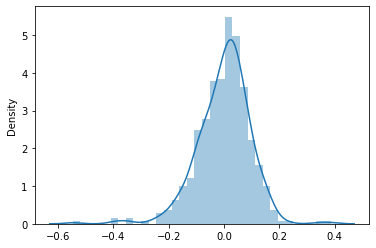

In [325]:
res = y_train-y_train_pred
sns.distplot(res)

In [326]:
#PREDICTION AND EVALUATION ON TEST SET

# Fit on data
num_vars=['atemp','hum','windspeed','cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [328]:
data_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [329]:
data_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [330]:
y_test = data_test.pop('cnt')
X_test = data_test

In [331]:
# adding constant
X_test_sm= sm.add_constant(X_test)

X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [334]:
#dropping the columns as we dropped on train set
X_test_sm = X_test_sm.drop(['holiday', 'atemp', 'hum', 'summer', 'Sunday', 'Thursday', 'Wednesday', 'Tuesday', 'winter', 'Monday'], axis=1)

In [336]:
#prdiction
y_test_pred = lr_model.predict(X_test_sm)


Text(0, 0.5, 'y_test_pred')

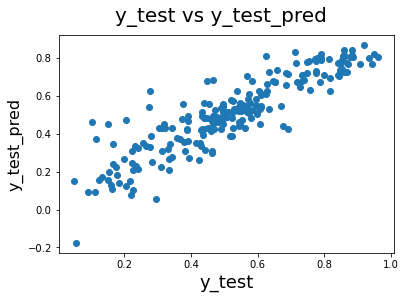

In [338]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [339]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [341]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.09863233718248555

In [342]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7951748098001048

In [343]:
#R Square of our model is 0.819

In [351]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          4.05e-169
Time:                        21:27:07   Log-Likelihood:                 474.47
No. Observations:                 510   AIC:                            -910.9
Df Residuals:                     491   BIC:                            -830.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     0.2857      0.029      9.710      0.000       0.228       0.344
yr                                                                                        0.2472      0.009     28.487      0.000       0.230       0.264
workingday                                                                                0.0555      0.012      4.672      0.000       0.032       0.079
windspeed                                                                                -0.1744      0.027     -6.427      0.000      -0.228      -0.121
spring                                                                                   -0.1172      0.022     -5.414      0.000      -0.160      -0.075
Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds    -0.3058      0.026    -11.583      0.000      -0.358      -0.254
Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist                                -0.0877      0.009     -9.388      0.000      -0.106      -0.069
Saturday                                                                                  0.0634      0.015      4.146      0.000       0.033       0.093
2                                                                                         0.0665      0.022      2.988      0.003       0.023       0.110
3                                                                                         0.1451      0.022      6.701      0.000       0.103       0.188
4                                                                                         0.1610      0.031      5.255      0.000       0.101       0.221
5                                                                                         0.2414      0.030      8.067      0.000       0.183       0.300
6                                                                                         0.2668      0.031      8.718      0.000       0.207       0.327
7                                                                                         0.2396      0.030      7.860      0.000       0.180       0.299
8                                                                                         0.2649      0.029      8.991      0.000       0.207       0.323
9                                                                                         0.3006      0.030     10.002      0.000       0.242       0.360
10                                                                                        0.2345      0.030      7.825      0.000       0.176       0.293
11 

# The equation for best fitted line is 
cnt = 0.2472 X yr + 0.0555 X workingday - 0.1744 X windspeed - 0.1172 X spring - 0.3058 X (Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds) - 0.0877 (X Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist) + 0.0634 X Sunday + 0.0634 X 2 + 0.1451 X 3 + 0.161 X 4 + 0.2414 X 5 + 0.2668 X 6 + 0.2396 X 7 + 0.2649 X 8 + 0.3006 X 9 
+0.2345 X 10 + 0.1308 X 11 + 0.0895 X 12

# We can see the demand for bikes depends mainly on below variables:

yr, workingday, windspeed, spring, (Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds), (X Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist) ,
Sunday, 2,3,4,5,6,7,8,9,10,11,12

Demand increases with workingday, Sunday, 2,3,4,5,6,7,8,9,10,11,12
Demand decreases with windspeed, spring, (Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds), (Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist) 

Demand is high in the months 4,5,6,7,8,9,10